In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pre_fun import *

from matplotlib import ticker

In [2]:
# import data
name = '20180607_model_1_imp_test1_0.sim'
name1 = '20180607_model_1_imp_test1_1.sim'
name2 = '20180607_model_1_imp_test1_2.sim'
name3 = '20180607_model_1_imp_test1_3.sim'

# load setup object
stp = Setup.load_setup( name )
stp1 = Setup.load_setup( name1 )
stp2 = Setup.load_setup( name2 )
stp3 = Setup.load_setup( name3 )

In [12]:
stp3.__dict__

{'D0': 100000000.0,
 'DA': 1.0,
 'DC': 1.0,
 'Dt': 0.0001,
 'E0_A': 0.0,
 'E0_C': 0.0,
 'I': 500,
 'I_middle': 0,
 'L': 40,
 'N': 524288,
 'T': 300,
 'T0': 1.6e-05,
 'alpha': 0.0,
 'c0': 0.6022140857,
 'cA': 0.5,
 'cC': 0.5,
 'chi1': 1.0,
 'chi2': 8430.407524526323,
 'current_data': array([[    0.        ,     0.        ,  1087.68448756, ...,
           818.26131212, -1047.35987911,  1689.52590837],
        [    0.        ,     0.        , -1087.68454136, ...,
          -818.26040804,  1047.3607862 , -1689.52500373]]),
 'epsilon': 1.0,
 'epsilon_m': 80.0,
 'f0': 1505535.2142500002,
 'input_voltage_data': array([ 0.        ,  4.06307904,  3.0885904 , ..., -3.69214617,
        -3.0885904 , -4.06307904]),
 'kA': 1e-06,
 'kC': 1e-06,
 'lengthscale': 1000000000.0,
 'model': 1,
 'phi0': 0.025851991011651636,
 'sim_method': 'c_only_imp',
 'simulation_date': '2018-06-08',
 'steady_state_tol': 1e-07,
 'testname': '20180607_model_1_imp_test1_3'}

In [14]:
1.0 / ( stp.T0 * stp.Dt * stp.N)

1192.0928955078125

In [65]:
# voltage data units?

(stp.input_voltage_data.max() - stp.input_voltage_data.min()) * stp.phi0**2 * 1e3

13.563032877258449

In [5]:
# calculate FFT

Fvoltage = np.fft.fft(stp.input_voltage_data * stp.phi0 ** 2)[1:int(stp.N/2)]
freq_ax = np.fft.fftfreq(stp.N, d = stp.Dt)[1:int(stp.N/2)] / stp.T0

Fvoltage1 = np.fft.fft(stp1.input_voltage_data * stp1.phi0 ** 2)[1:int(stp1.N/2)]
freq_ax1 = np.fft.fftfreq(stp1.N, d = stp1.Dt)[1:int(stp1.N/2)] / stp1.T0

Fvoltage2 = np.fft.fft(stp2.input_voltage_data * stp2.phi0 ** 2)[1:int(stp2.N/2)]
freq_ax2 = np.fft.fftfreq(stp2.N, d = stp2.Dt)[1:int(stp2.N/2)] / stp2.T0

Fvoltage3 = np.fft.fft(stp3.input_voltage_data * stp3.phi0 ** 2)[1:int(stp3.N/2)]
freq_ax3 = np.fft.fftfreq(stp3.N, d = stp3.Dt)[1:int(stp3.N/2)] / stp3.T0

# anodic current
Fcurrent_A = np.fft.fft(-stp.current_data[0,:])[1:int(stp.N/2)]
Fcurrent_A1 = np.fft.fft(-stp1.current_data[0,:])[1:int(stp1.N/2)]
Fcurrent_A2 = np.fft.fft(-stp2.current_data[0,:])[1:int(stp2.N/2)]
Fcurrent_A3 = np.fft.fft(-stp3.current_data[0,:])[1:int(stp3.N/2)]

# catodic current
# Fcurrent_C = np.fft.fft(stp.current_data[1,:])[1:int(stp.N/2)]

# calculate Impedance

# from anodic current and catodic current
ZA = 1e3 *  Fvoltage / Fcurrent_A
ZA1 = 1e3 *  Fvoltage1 / Fcurrent_A1
ZA2 = 1e3 *  Fvoltage2 / Fcurrent_A2
ZA3 = 1e3 *  Fvoltage3 / Fcurrent_A3


Current in $ \frac{mA}{cm^2} $

Voltage in $ V $

Unit of Impedance

$$ \left[ Z \right] = \left[ \frac{V}{I} \right] = \frac{V}{mA cm^{-2}} = 10^3 \Omega cm^2$$

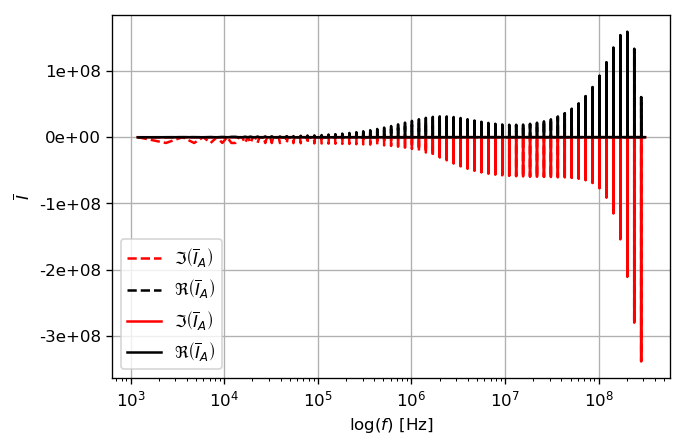

In [6]:
fig = plt.figure(dpi = 120)

ax = fig.add_subplot(1,1,1)

#ax.plot(freq_ax1, Fvoltage1.imag)

# anodic
ax.plot(freq_ax, Fcurrent_A.imag, color = "red",ls = '--', label = r"$\Im \left( \overline{I}_A \right) $")
ax.plot(freq_ax, Fcurrent_A.real, color = "black",ls = '--', label = r"$\Re \left( \overline{I}_A \right) $")

ax.plot(freq_ax1, Fcurrent_A1.imag, color = "red", ls = '-', label = r"$\Im \left( \overline{I}_A \right) $")
ax.plot(freq_ax1, Fcurrent_A1.real, color = "black", ls = '-', label = r"$\Re \left( \overline{I}_A \right) $")

# catodic
# ax.plot(freq_ax1, Fcurrent_C.imag, color = "red", ls = '--')
# ax.plot(freq_ax1, Fcurrent_C.real, color = "black", ls = '--')

# scales
ax.set_xscale('log')
# ax.set_yscale('symlog', linthresh = 1e-14)

# labels
ax.set_xlabel(r"$\log (f)$ [Hz]")
ax.set_ylabel(r"$\overline{I}$")

# grid
ax.grid(b=True, which = 'major', axis = 'both')

# ticks and ticklabels
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.0e"))

ax.legend()

plt.show()

#fig.savefig( "20180607_model_1_imp_test1_0_FIvsf_anodic.pdf", format = "pdf", dpi = 300)

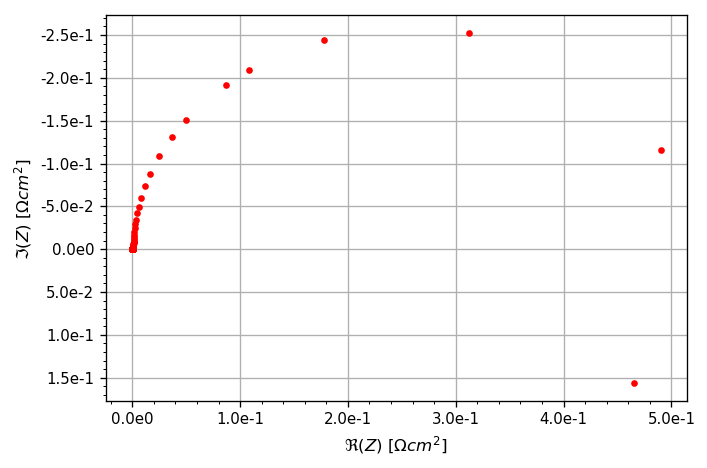

In [ ]:


# Nyquist plot
fig = plt.figure(dpi = 120)

ax = fig.add_subplot(1,1,1)

# ax.plot((ZA.real), (ZA.imag), marker = ".", ls = "None", color = 'red', label = r"Anodic")
ax.plot((ZA1.real), (ZA1.imag), marker = ".", ls = "None", color = 'red', label = r"Anodic")
# ax.plot((ZA2.real), (ZA2.imag), marker = ".", ls = "None", color = 'red', label = r"Anodic")
# ax.plot(np.abs(ZA3.real), (ZA3.imag), marker = "p", ls = "None", color = 'red', label = r"Anodic")
# ax.plot(ZC.real, (ZC.imag), marker = ".", ls = "None", color = 'blue', label = r"Catodic")


#
# ax.set_xlim([0,0.0012])
# ax.set_ylim([0,0.045])
# ax.set_xlim([-1e-5,0.0002])

# scales
# ax.set_xscale('log')
# ax.set_yscale('symlog', linthresh = 1e-14)

# labels
ax.set_xlabel(r"$\Re (Z)$ $\left[ \Omega cm^2\right]$ ")
ax.set_ylabel(r"$\Im (Z)$ $\left[ \Omega cm^2\right]$ ")

# grid
ax.grid(b=True, which = 'major', axis = 'both')

# ticks and ticklabels
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1e"))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1e"))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

# ax.legend()

ax.invert_yaxis()

plt.draw()

# get ticklabels
ty = ax.get_yticklabels()
tx = ax.get_xticklabels()

# modify ticklabel: remove annoying +0 in exponent
for el in ty:
    
    if not el.get_text() == '':
        ylab = el.get_text().split(sep = 'e')[0] + 'e' + el.get_text().split(sep = 'e')[1].replace('+0','').replace('-0','-')
        el.set_text(ylab)

for el in tx:

    if not el.get_text() == '':
        xlab = el.get_text().split(sep = 'e')[0] + 'e' + el.get_text().split(sep = 'e')[1].replace('+0','').replace('-0','-')
        el.set_text(xlab)

# set ticklabels
ax.set_yticklabels(ty, fontsize = 9)
ax.set_xticklabels(tx, fontsize = 9)

fig.tight_layout()

plt.show()

# save plot as pdf and png
for fmt in ['png', 'pdf']:
    fig.savefig( "20180607_model_1_imp_test1_1_" + "Z_Nyquist." + fmt, format = fmt, dpi = 300)
print("fig saved!")


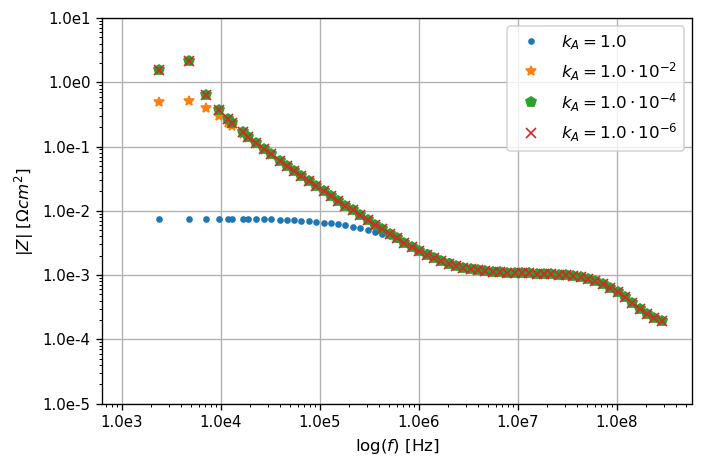

fig saved!


In [19]:
# Bode plot
fig = plt.figure(dpi = 120)

ax = fig.add_subplot(1,1,1)

ax.plot(freq_ax, np.absolute(ZA), marker = ".", ls = "None", label = r"$k_A = 1.0$")
ax.plot(freq_ax1, np.absolute(ZA1), marker = "*", ls = "None", label = r"$k_A = 1.0\cdot 10^{-2}$")
ax.plot(freq_ax2, np.absolute(ZA2), marker = "p", ls = "None", label = r"$k_A = 1.0\cdot 10^{-4}$")
ax.plot(freq_ax3, np.absolute(ZA3), marker = "x", ls = "None", label = r"$k_A = 1.0\cdot 10^{-6}$")

fig.tight_layout()

# set log scales
ax.set_xscale("log")
ax.set_yscale("log")

# set limits
ax.set_ylim([1e-5, 1e1]) #np.max(np.absolute(ZA)) + 0.2 * np.max(np.absolute(ZA))])

# grid
ax.grid(b=True, which = 'major', axis = 'both')

# ticks and ticklabels
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1e"))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1e"))


# set labels
ax.set_xlabel(r"$\log (f)$ [Hz]")
ax.set_ylabel(r"$\left| Z \right|$ $\left[ \Omega cm^2 \right]$ ")

plt.draw()

# # get ticklabels
ty = ax.get_yticklabels()
tx = ax.get_xticklabels()

# # modify ticklabel: remove annoying +0 in exponent
for el in ty:
    
    if not el.get_text() == '' and el.get_text().split(sep = 'e').__len__() >1:
        ylab = el.get_text().split(sep = 'e')[0] + 'e' + el.get_text().split(sep = 'e')[1].replace('+0','').replace('-0','-')
        el.set_text(ylab)

for el in tx:

    if not el.get_text() == '' and el.get_text().split(sep = 'e').__len__() >1:
        xlab = el.get_text().split(sep = 'e')[0] + 'e' + el.get_text().split(sep = 'e')[1].replace('+0','').replace('-0','-')
        el.set_text(xlab)

# set ticklabels
ax.set_yticklabels(ty, fontsize = 9)
ax.set_xticklabels(tx, fontsize = 9)

ax.legend()

fig.tight_layout()

plt.show()

# save plot as pdf and png
for fmt in ['png', 'pdf']:
    fig.savefig( "20180607_model_1_imp_test1_all_" + "Z_Bode." + fmt, format = fmt, dpi = 300)
print("fig saved!")